# Cálculo RMRC

## Algoritmo RMRC
> 1. Especificar la posición inicial del robot
> 2. Iterar por todo el rango del vector tiempo
>> 1. Especificar la posición actual del robot
>> 2. Comparar la posición actual con la posición deseada
>> 3. Obtener la velocidad articular mediante el jacobiano
>> 4. Integrar la velocidad angular 
>> 5. Obtener la posición actual

## Preparación del entorno

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#DEFINIR PARÁMETROS DE SIMULACIÓN

#Tiempo inicial
ti = 0

#Duración en hacer el círculo(Período). Tiempo final de la simulación
T = 2

#Tamaño de paso
dt = 1/60

#Numero de elementos
n = (T-ti)/dt
    
#Vector tiempo
t = np.arange(ti,T+dt,dt)


#Definir limites para cada variable
    # 0<=

#DEFINIR LA TRAYECTORIA DEL EFECTOR FINAL

#Centro del circulo en la posición inicial del robot
x0 = 210
y0 = 0
z0 = 100

#Radio del circulo
r = 30

ze = r*np.sin((2*np.pi/T)*t)+z0
ye = r*np.cos((2*np.pi/T)*t)+y0
xe = x0*np.ones(int(n+1))

#Posicion del efector final
Xe = np.array([xe,
               ye,
               ze])

xed = 0*np.ones(int(n+1))
yed = -r*np.sin((2*np.pi/T)*t)
zed = r*np.cos((2*np.pi/T)*t)

#Velocidad del efector final
Xed = np.array([xed,
                yed,
                zed])


#Arreglo para almacenar la posicion y velocidad angular
q = np.zeros((3,int(n+1)))
qd = np.zeros((3,int(n+1)))

#Posicion actual del efector final
Xa = np.zeros((3,int(n+1)))

#Arreglo para el erro
e = np.zeros((3,int(n+1)))


### Definir los parámetros del robot

In [3]:
d1 = 100
a2 = 100
a3 = 100
a_e = 10

### Definir los ángulos de la posición actual

In [4]:
theta1 = 0*np.pi/180
theta2 = 0*np.pi/180
theta3 = 5*np.pi/180

#Posicion inicial
q[:,0] = np.array([[theta1],[theta2],[theta3]]).reshape((3,))
#Velocidad angular inicial
qd[:,0] = np.array([[0],[0],[0]]).reshape((3,))

###  Especificar la posición inicial

### Iteración sobre el vector tiempo

In [5]:
Xa[:,0] = np.array([[(a3*np.cos(theta2) + a_e*np.cos(theta2 + theta3))*np.cos(theta1) ],
                   [(a3*np.cos(theta2) + a_e*np.cos(theta2 + theta3))*np.sin(theta1) ],
                   [a3*np.sin(theta2) + a_e*np.sin(theta2 + theta3) + d1]]).reshape((3,))

#### Definir la matriz de ganancias K

In [6]:
#Ganancias inviduales
k1 = 2
k2 = 20
k3 = 25
K = np.array([[k1,0,0],[0,k2,0],[0,0,k3]])

#### Definir la función para el jacobiano

In [7]:
def jacobiano(theta1,theta2,theta3):
    Jv1 = np.array([[-(a3*np.cos(theta2) + a_e*np.cos(theta2 + theta3))*np.sin(theta1)],
                    [(a3*np.cos(theta2) + a_e*np.cos(theta2 + theta3))*np.cos(theta1)],
                    [0]]) 
    
    Jv2 = np.array([[(-a3*np.sin(theta2) - a_e*np.sin(theta2 + theta3))*np.cos(theta1)], 
                    [(-a3*np.sin(theta2) - a_e*np.sin(theta2 + theta3))*np.sin(theta1)], 
                    [a3*np.cos(theta2) + a_e*np.cos(theta2 + theta3)]]) 
    
    Jv3 = np.array([[-a_e*np.sin(theta2 + theta3)*np.cos(theta1)], 
                    [-a_e*np.sin(theta1)*np.sin(theta2 + theta3)], 
                    [a_e*np.cos(theta2 + theta3)]])
    
    return np.transpose(np.reshape(np.array([Jv1,Jv2,Jv3]),(3,3)))

## ALGORITMO EN ACCIÓN

In [8]:
for i in range(int(n)):
   
    Xi = np.array([[Xe[0][i]],[Xe[1][i]],[Xe[2][i]]]).reshape((3,)) #Posicion deseada
    Xdi = np.array([[Xed[0][i]],[Xed[1][i]],[Xed[2][i]]]) #Velocidad deseada
    
    #Comparando la posición deseada con la posición actual
    e[:,i] = (Xi-Xa[:,i])

    J = jacobiano(theta1,theta2,theta3)
    #Obtener la velocidad articular
    qd[:,i+1] = np.matmul(np.linalg.inv(J),Xdi + np.matmul(K,e[:,i].reshape((3,1)))).reshape((3,))
  
    #Obtener la posicion articular
    q[:,i+1] = q[:,i] + qd[:,i+1]*dt
    
    theta1 = q[0,i+1]
    theta2 = q[1,i+1]
    theta3 = q[2,i+1]
    
   
    #Actualizar la posicion actual
    Xa[:,i+1] =  np.array([[(a2 + a3*np.cos(theta2) + a_e*np.cos(theta2 + theta3))*np.cos(theta1) ],
                   [(a2 + a3*np.cos(theta2) + a_e*np.cos(theta2 + theta3))*np.sin(theta1)],
                   [a3*np.sin(theta2) + a_e*np.sin(theta2 + theta3) + d1]]).reshape((3,))
   

## Graficar resultados


### Grafica de error

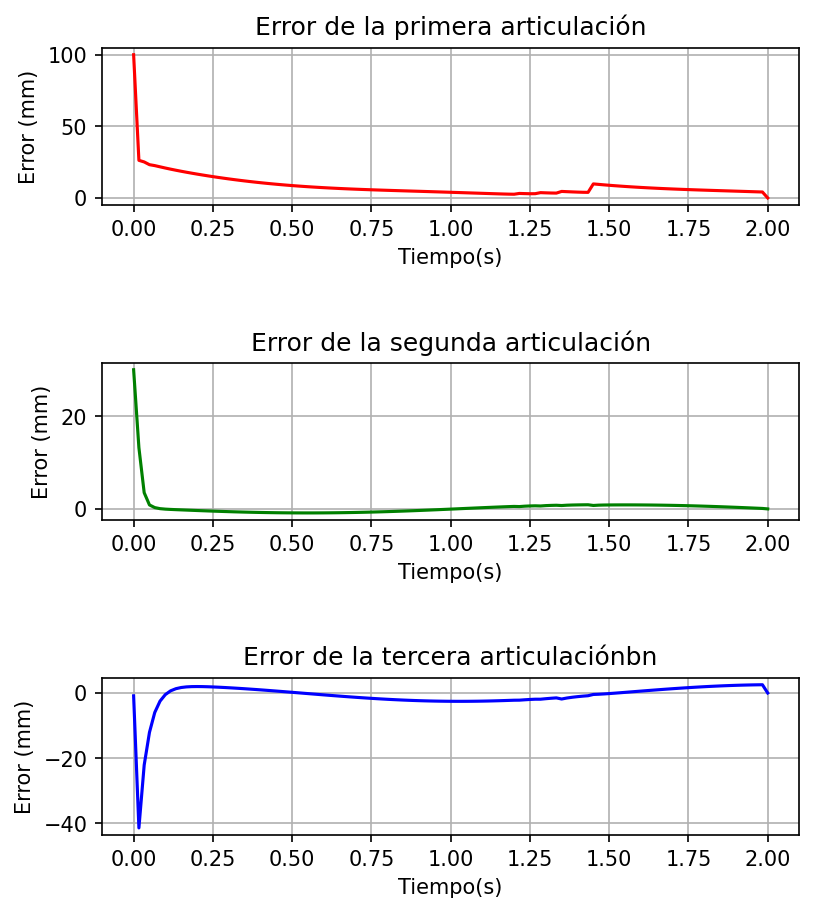

In [9]:
#Crear subplot
Fig,ax = plt.subplots(3,figsize=(6,6),dpi = 150) # Genera 3 subplots
plt.subplots_adjust(top = 1,hspace = 1) #Ajustar el tamaño de la grafica

#Grafica 1
ax[0].plot(t,e[0,:],'r-')
ax[0].set_title('Error de la primera articulación')
ax[0].set_xlabel('Tiempo(s)')
ax[0].set_ylabel('Error (mm)')

ax[0].grid(True)

#Grafica 2
ax[1].plot(t,e[1,:],'g-')
ax[1].set_title('Error de la segunda articulación')
ax[1].set_xlabel('Tiempo(s)')
ax[1].set_ylabel('Error (mm)')
ax[1].grid(True)

#Grafica 3
ax[2].plot(t,e[2,:],'b-')
ax[2].set_title('Error de la tercera articulaciónbn')
ax[2].set_xlabel('Tiempo(s)')
ax[2].set_ylabel('Error (mm)')
ax[2].grid(True)





### Grafica del efector final


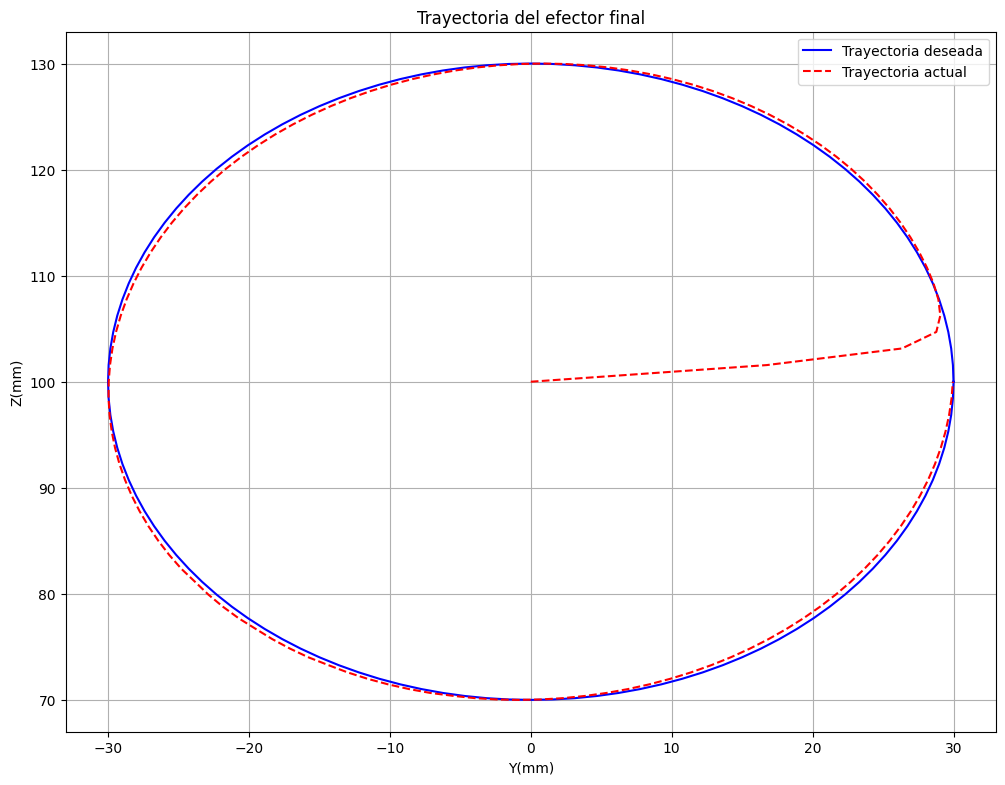

In [13]:
Fig2, ax = plt.subplots(figsize = (12,8),dpi = 100)
plt.subplots_adjust(top = 1,hspace = 0.5) #Ajustar el tamaño de la grafica


ax.plot(Xe[1,:],Xe[2,:],'b-') #Valor deseado
ax.plot(Xa[1,:],Xe[2,:],'r--') #Valor actual

ax.set_title('Trayectoria del efector final')
ax.set_xlabel('Y(mm)') 
ax.set_ylabel('Z(mm)')

#Poner la legenda a los ejes
ax.legend(['Trayectoria deseada','Trayectoria actual'],loc = 'upper right')
plt.grid(True)
#Cambiar tamaño de la figura
plt.show()

### Grafica de las articulaciones del robot

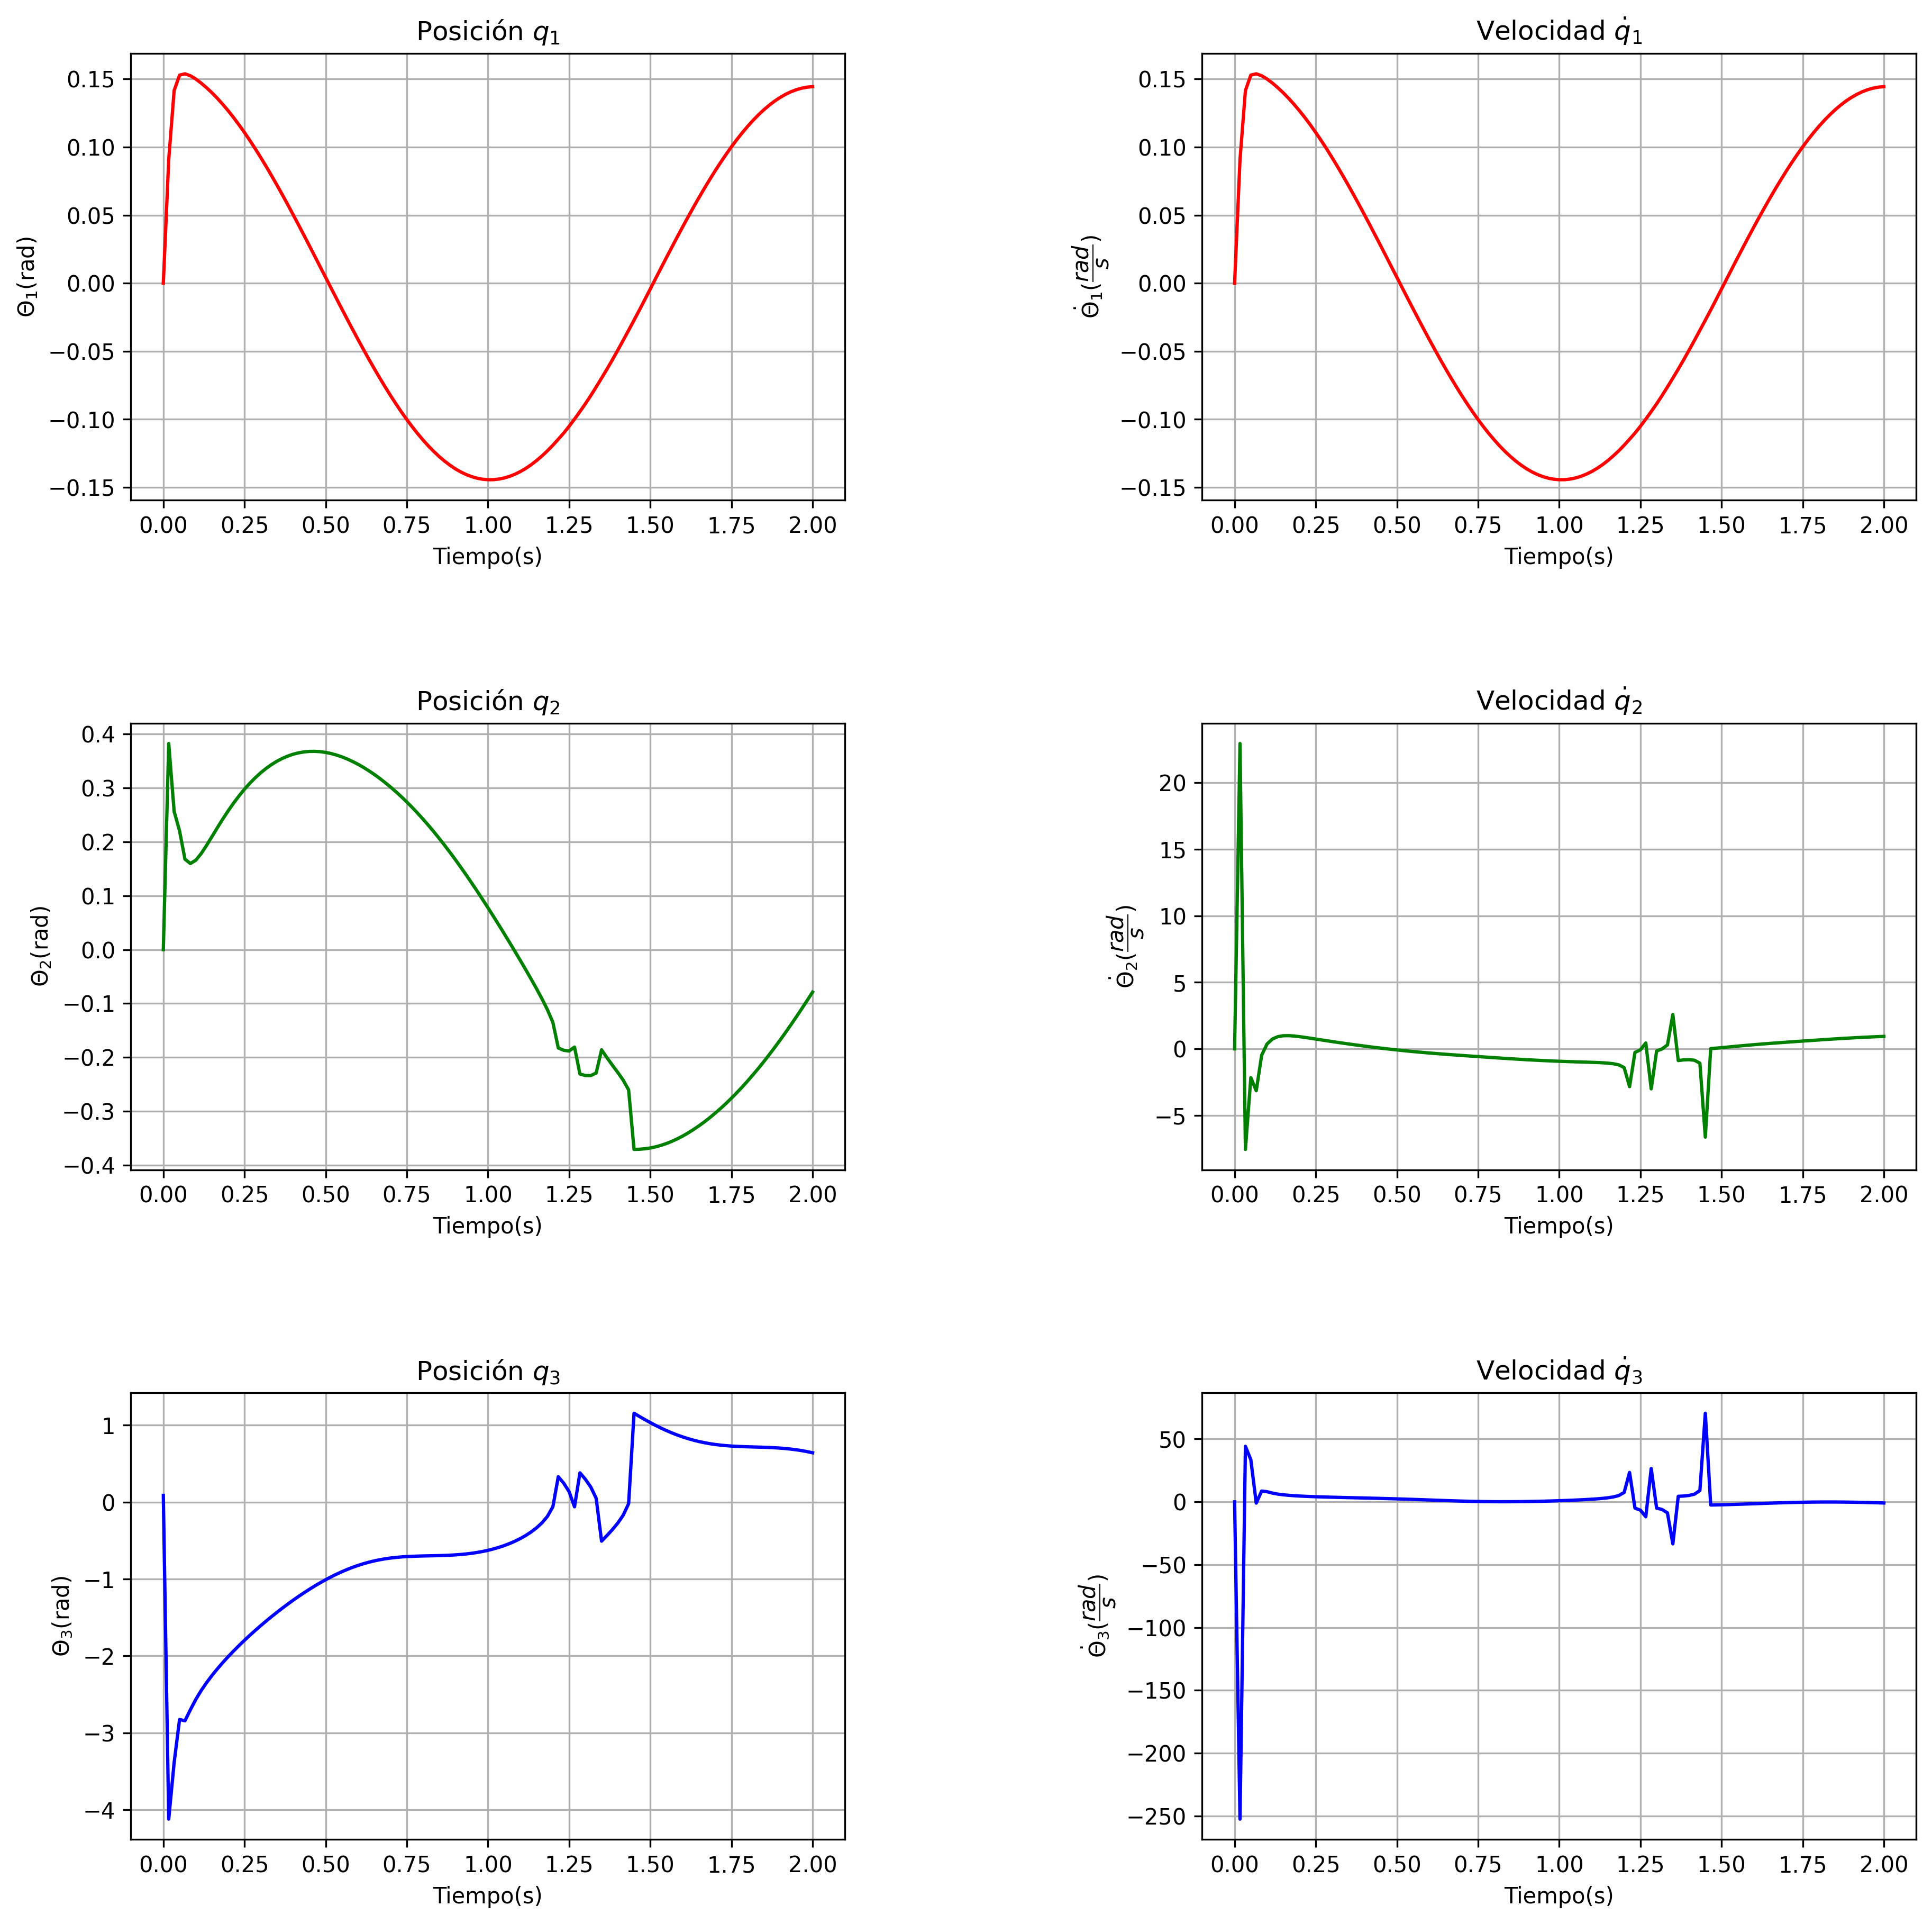

In [12]:
Fig3,axq = plt.subplots(3,2,figsize= (6,6),dpi = 300)
plt.subplots_adjust(top = 2,right = 2,hspace = 0.5,wspace = 0.5)

#POSICIONES

#Articulación 1
axq[0,0].plot(t,q[0,:],'r-')
axq[0,0].set_title('Posición $q_1$')
axq[0,0].set_xlabel('Tiempo(s)')
axq[0,0].set_ylabel('$\Theta_1$(rad)')
axq[0,0].grid(True)

#Articulación 2
axq[1,0].plot(t,q[1,:],'g-')
axq[1,0].set_title('Posición $q_2$')
axq[1,0].set_xlabel('Tiempo(s)')
axq[1,0].set_ylabel('$\Theta_2$(rad)')
axq[1,0].grid(True)

#Articulación 3
axq[2,0].plot(t,q[2,:],'b-')
axq[2,0].set_title('Posición $q_3$')
axq[2,0].set_xlabel('Tiempo(s)')
axq[2,0].set_ylabel('$\Theta_3$(rad)')
axq[2,0].grid(True)



#VELOCIDADES ANGULARES

#Articulación 1
axq[0,1].plot(t,q[0,:],'r-')
axq[0,1].set_title('Velocidad $\dot{q}_1$')
axq[0,1].set_xlabel('Tiempo(s)')
axq[0,1].set_ylabel('$\dot{\Theta}_1(\dfrac{rad}{s})$')
axq[0,1].grid(True)

#Articulación 2
axq[1,1].plot(t,qd[1,:],'g-')
axq[1,1].set_title('Velocidad $\dot{q}_2$')
axq[1,1].set_xlabel('Tiempo(s)')
axq[1,1].set_ylabel('$\dot{\Theta}_2(\dfrac{rad}{s})$')
axq[1,1].grid(True)

#Articulación 3
axq[2,1].plot(t,qd[2,:],'b-')
axq[2,1].set_title('Velocidad $\dot{q}_3$')
axq[2,1].set_xlabel('Tiempo(s)')
axq[2,1].set_ylabel('$\dot{\Theta}_3(\dfrac{rad}{s})$')
axq[2,1].grid(True)






